In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [2]:
# loading the dataset from drive
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
! [ -e /content ] && pip install -Uqq fastai

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from fastai.vision import *
path1 = '/content/drive/MyDrive/MovieGenreCassification/test_data.txt'
path2 = '/content/drive/MyDrive/MovieGenreCassification/test_data_solution.txt'
path3 = '/content/drive/MyDrive/MovieGenreCassification/train_data.txt'

In [6]:
# loading the dataset to Pandas Dataframe
movie_test = pd.read_csv('/content/drive/MyDrive/MovieGenreCassification/test_data.txt', sep=':::', names=['Id', 'Title', 'Description'], engine='python')
# movie_test_solution = pd.read_csv('/content/drive/MyDrive/MovieGenreCassification/test_data_solution.txt')
movie_train = pd.read_csv('/content/drive/MyDrive/MovieGenreCassification/train_data.txt', sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [7]:
print(movie_train)

                                              Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                                                                                                                                               

In [8]:
movie_train.head()

Title       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Description  
1                                                        Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                  A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.  
3   As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little "acquisition. " Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the b...  
4   To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their father strikes oil, the family enjoys a new prosperity and the sisters meet the eligible Jack Herron, a fellow oil prospector. To Grace's shock, Jack falls in love with Edith and in her jealousy, Grace tells Jack that Edith, not she, has a drug problem. Hinting that her sister will soon need more morph...  
5   The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of heightened anxiety and/or alertness can cause the average person to make the sort of imaginative connections that are normally made only by artists and conspiracy theorists-both of whom figure prominently in this film. The Unrecovered explores the way in which irony, empathy, and paranoia relate to one...

In [9]:
movie_train.tail()

Title          Genre  \
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Description  
54210                                                                                               This short-lived NBC live sitcom centered on Bonino, a world-famous concert singer who leaves show business to care for his eight children after the death of his wife. His manager, Walter Rogers ('David Opatoshu' (qv)) did everything he could during the 3-1/2 months this show was on the air to convince him to come back. He couldn't, despite Bonino realizing that his kids were more independent than he thoguht. Viewers got a chance to see Bonino (opera singer 'Ezio Pinza' (qv)) sing during each episode.  
54211   The NEXT Generation of EXPLOITATION. The sisters of Kapa - Bay Sorority House are mysteriously vanishing. The girls have been abducted and locked up in a horse stable, forced into sexual slavery and depravity, which leads to a fight to their final breath. Electric ear devices are planted to prevent escape with electric shock therapy. The diabolical family is an incest ridden tribe of an obese woman that never stops eating and a midget with a voice box for parents. Their two sons are repulsive, drooling inbreds with speech problems and a scabbed head. The daughter is a beautiful, young wom...  
54212                                                                                                                                                                                                                                                                                                                                                           Ze bestaan echt, is a stand-up comedy about growing up and facing your fears. Freer and more organic than in 'Spek' Ronald speaks about which are the things to watch out for, what is going on 'out there' and how you can recognize people who are not okay.  
54213   Walter and Vivian live in the country and have a difficult time keeping servants. Walter hires an private detective who has been fired for arresting the District Attorney. They only way that Walter can get Jerry to work for him is to tell Jerry that his life is in danger; the neighbor is trying to take his wife; and that Nazi spies are everywhere. Jerry needs a cook for his 'cover' so he gets his fiancée Susan to work with him. To keep Jerry working, Walter sends the threatening letters to himself and hires actors to play the spies. It soon becomes apparent that Susan cannot cook and Jerr...  
54214                                                                                                                                                                                                                                                                                                   On Labor Day Weekend, 1935, the most intense hurricane to ever make landfall on America's shores hit the Florida Keys. The country was just starting to recover from the Great Depression when the ferocious beast with its 200 mile-an-hour winds and violent storm surge overpowered nearl

In [10]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [11]:
movie_train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [12]:
movie_test.head()

Id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Description  
0                                                                                            L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.  
1   Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civ...  
2            One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products.  
3   His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are agai...  
4   Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car acci...

In [13]:
movie_test.tail()

Id                             Title  \
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Description  
54195   Covering multiple genres, Tales of Light & Dark is an anthology web series by Light & Dark Productions that explores the light and dark side of humanity. Episode 1: Lolli Girl - The misadventures of a young British woman whose only want in life is to find a friend. Episode 2: Open Call - For years, Mary David has yearned to escape the dreary boredom of being a housewife. Now Mary is about to get the opportunity of her life. Episode 3: Truth, Justice and the American Way - Father Peter's faith and morality is put to the test after the tragic death of a young woman. Episode 4: GeoKilling - ...  
54196                                                                                                                                                                                                                                           As Alice and Cora Munro attempt to find their father, a British officer in the French and Indian War, they are set upon by French soldiers and their cohorts, Huron tribesmen led by the evil Magua. Fighting to rescue the women are Chingachgook and his son Unkas, the last of the Mohican tribe, and their white ally, the frontiersman Natty Bumppo, known as Falkenauge.  
54197                                                                                                                                                                                                                                                                                      A movie 169 years in the making. Oliver Twist, the Artful Dodger, and Fagin. The lovers will love Fagin's waifs. Plus, there's Mr. Bumble and the hairy-chested Detective Brownlow. It's 2007, the location is South Beach FL, Fagin is a pimp and his boys are whores. But that co-dependent bitch Nancy still gets it in the end!  
54198                                                                                                                                                                                                                        Popular, but mysterious rock D.J Mike Mallard (Askew) (who broadcasts his show from an isolated farmhouse) is one day found by a four young people who land their plane nearby his farm. One of them, Kathy (Oatman), falls for Mallard who is also battling with his producer (Rill) over his refusal to play the commercial music that the radio station and record companies want him to play.  
54199                         Curitiba is a city in movement, with rhythms and different pulsations, a great composed mosaic for fragments of different colors and sizes, that coexist, however nor always are touched. A city of contrasts, light and darkness, indifference and solidarity, errors and repentances. It's the coldest week on Curitiba's winter. The scenery where faces pass for the windows of the cars and people divide the sidewalk without its looks if cross, that four histories are counted on four men who have their lives transformed when the conscience talk louder than the survival instinct.

In [14]:
movie_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
movie_test.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

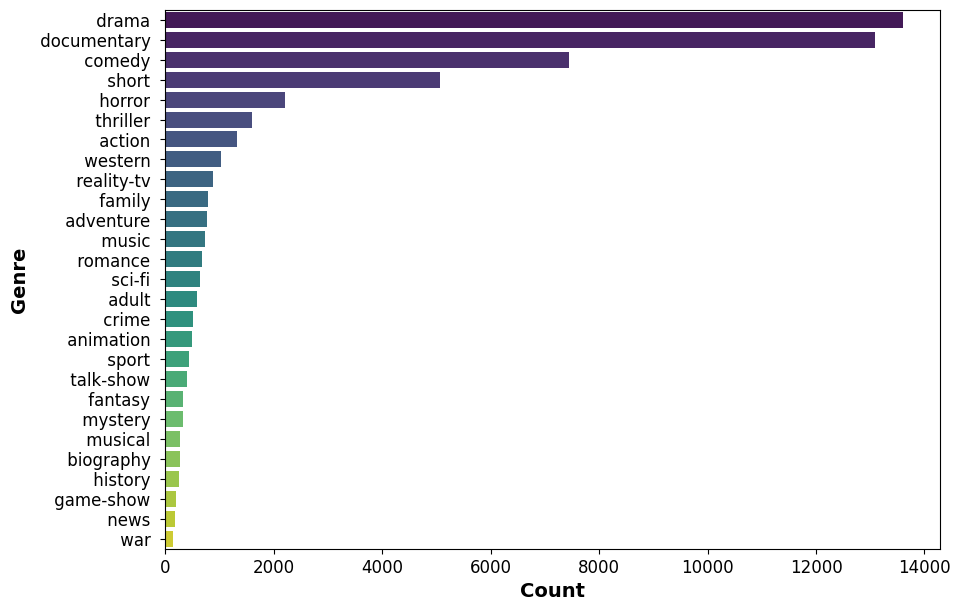

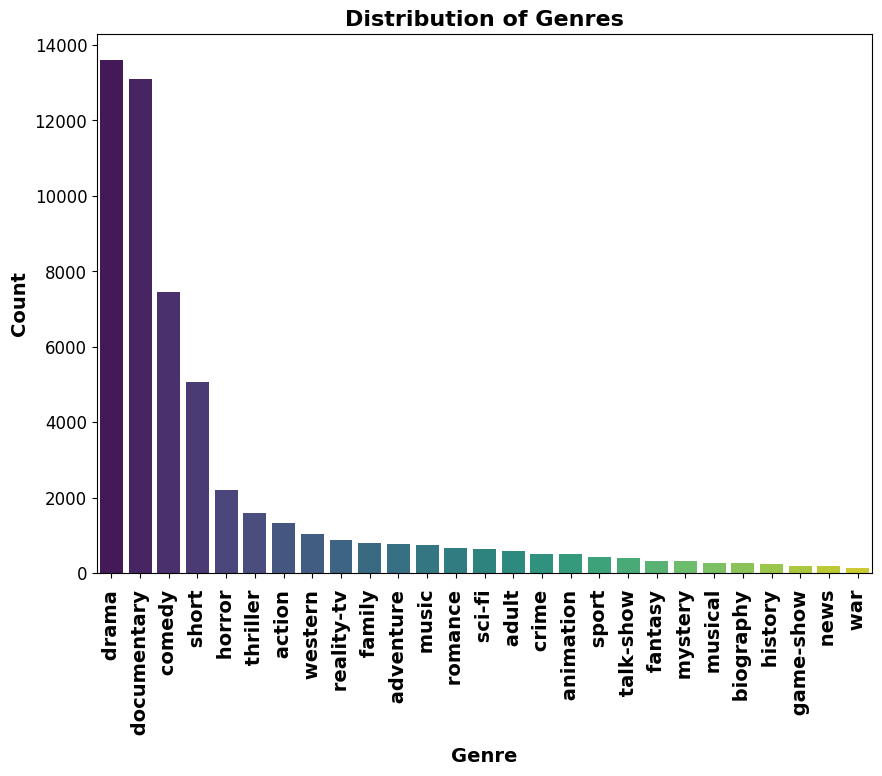

In [16]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(10, 7))
sns.countplot(data=movie_train, y='Genre', order=movie_train['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(10, 7))
counts = movie_train['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
movie_train['Text_cleaning'] = movie_train['Description'].apply(clean_text)
movie_test['Text_cleaning'] = movie_test['Description'].apply(clean_text)

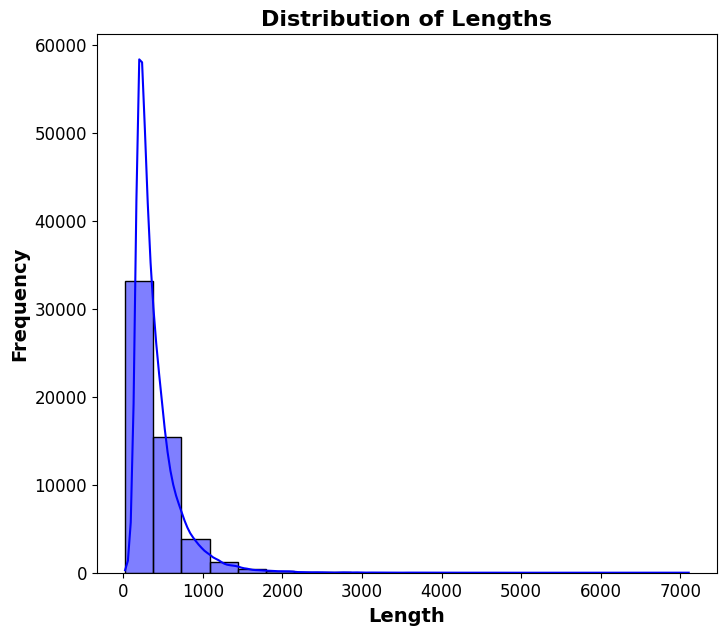

In [19]:
# Calculate the length of cleaned text
movie_train['length_Text_cleaning'] = movie_train['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=movie_train, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [20]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(movie_train['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(movie_test['Text_cleaning'])

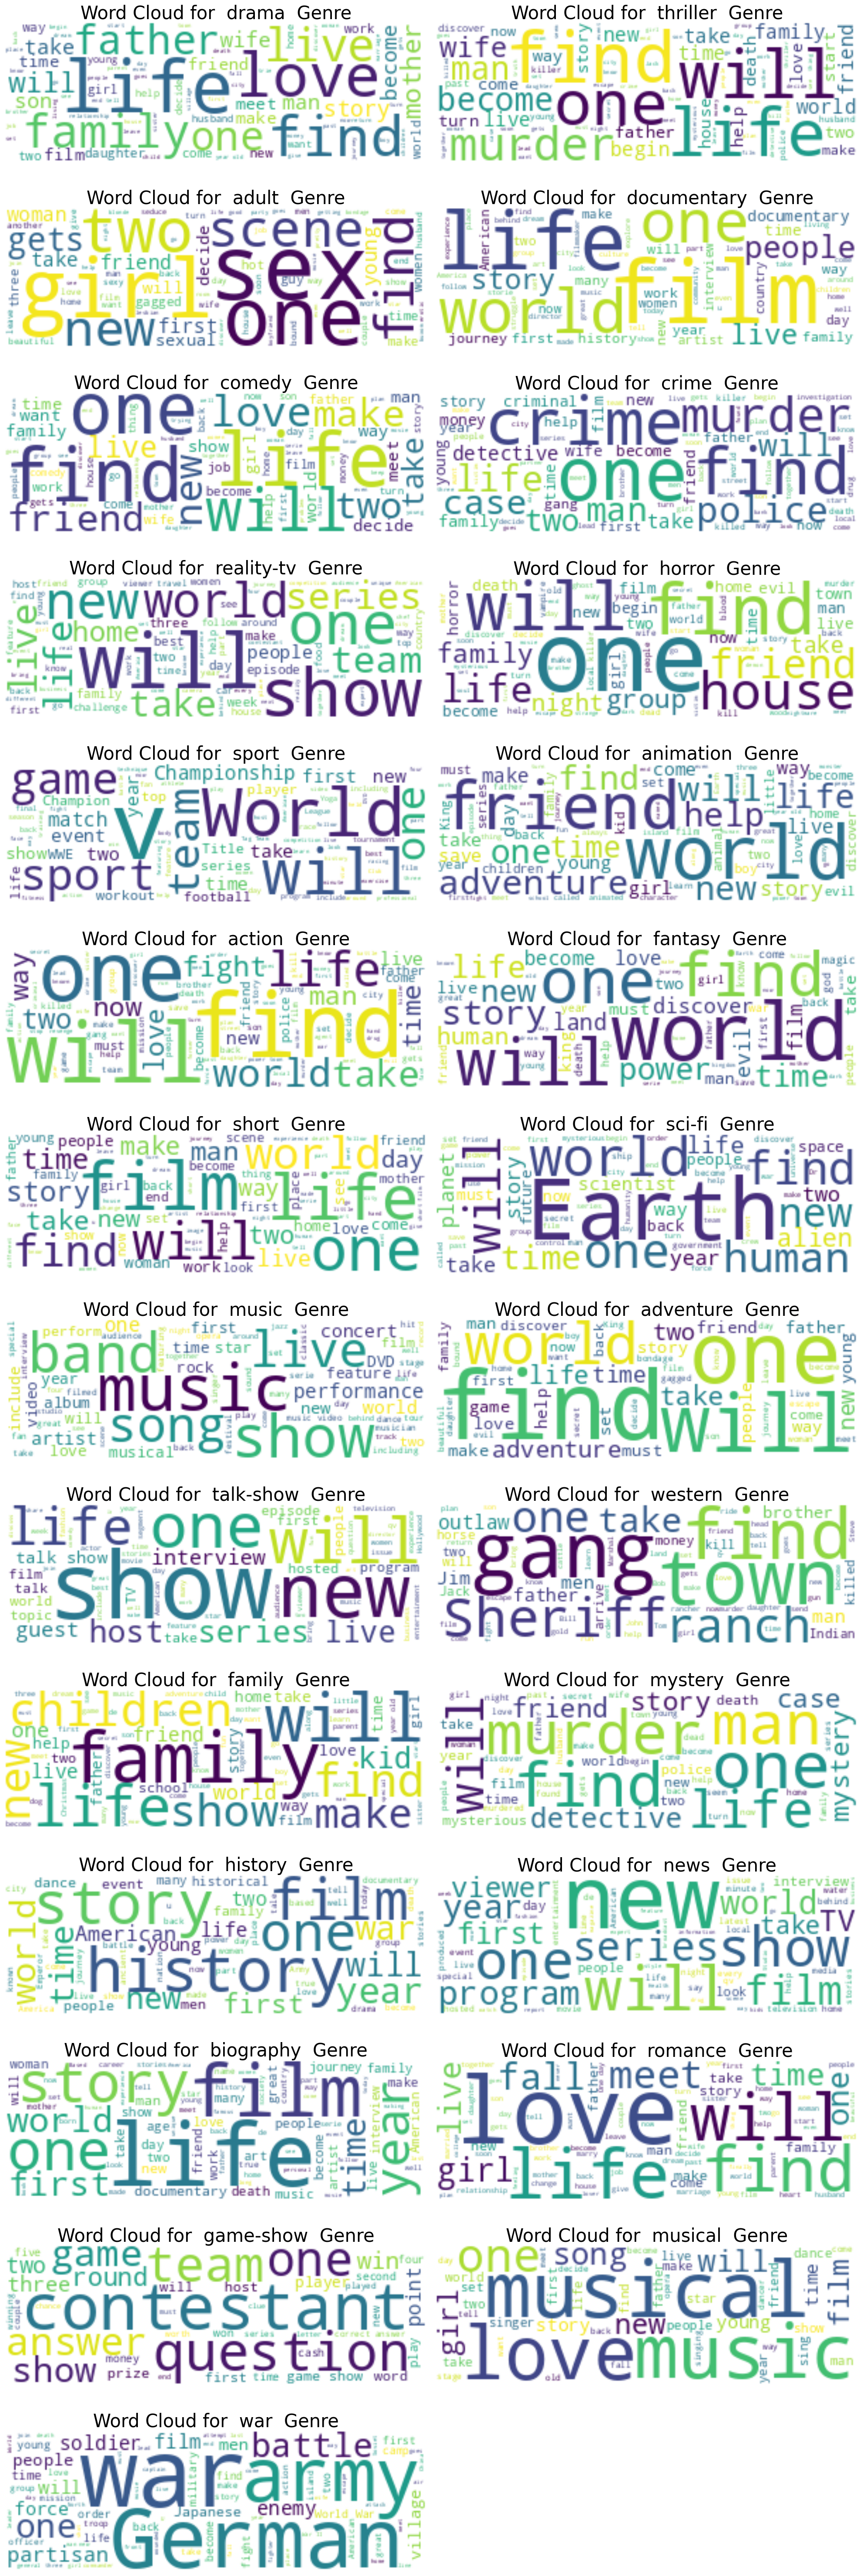

In [21]:
## Below code will generate wordcloud of each genre

# Create a list of unique genres from the dataset
genres = movie_train['Genre'].unique()

# Set the figure size outside the loop
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(movie_train[movie_train["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')


plt.tight_layout()
plt.show()

In [22]:
# Split the data into training and validation sets
X = X_train
y = movie_train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44526422576777647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
movie_test['Predicted_Genre'] = X_test_predictions

In [24]:
# Save the test_data DataFrame with predicted genres to a CSV file
movie_test.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(movie_test)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                                                                                                                                                                                                                                                                                                                                                                                               